In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train_df = pd.read_csv('survey.csv')
train_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 14:28:28,4110386494,Male,United Kingdom,NaN,No,Yes,Yes,Sometimes,26-100,...,Very easy,Yes,Yes,Some of them,Some of them,No,No,Don't know,No,NaN
1,2014-08-27 12:23:59,2030392273,Male,United Kingdom,NaN,No,Yes,No,Never,100-500,...,Don't know,Maybe,No,Some of them,No,No,Yes,Don't know,No,NaN
2,2014-08-27 19:16:15,1530321066,male,United States,MI,No,Yes,Yes,Never,6-25,...,Don't know,Yes,No,Yes,Yes,No,No,Don't know,No,NaN
3,2015-02-21 15:28:57,3848891375,F,United States,TX,No,Yes,No,Never,100-500,...,Don't know,Maybe,No,No,Yes,No,No,Don't know,No,NaN
4,2014-08-27 13:00:38,3500415666,Female,United States,MI,No,Yes,Yes,NaN,More than 1000,...,Very difficult,Yes,Maybe,Yes,No,No,Yes,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,2014-08-27 12:32:24,1475042001,Male,United States,AL,No,Yes,Yes,Sometimes,26-100,...,Very easy,No,No,No,No,Maybe,No,Yes,No,NaN
10214,2014-08-27 12:57:38,1304209295,f,United Kingdom,NaN,No,No,No,Sometimes,More than 1000,...,Don't know,No,No,Some of them,No,No,Maybe,Don't know,No,NaN
10215,2014-08-27 15:09:58,3993008420,Male,United States,TN,No,No,Yes,Sometimes,More than 1000,...,Somewhat easy,No,No,Yes,No,No,Maybe,Don't know,No,NaN
10216,2015-02-21 04:23:05,2478720218,Male,Portugal,NaN,No,No,No,Rarely,100-500,...,Don't know,No,No,Some of them,No,No,Maybe,Don't know,No,NaN


In [3]:
total = train_df.isnull().sum().sort_values(ascending=False)
print(total)

comments                     9742
state                        4120
work_interfere               2294
self_employed                  33
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


In [4]:
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)
train_df.drop(['Country'], axis= 1, inplace=True)


In [6]:
s = pd.Series(train_df['Age'])
print(train_df['Age'].median())

s[s<18] = train_df['Age'].median()
train_df['Age'] = s

s = pd.Series(train_df['Age'])

s[s>120] = train_df['Age'].median()
train_df['Age'] = s

train_df['Age'].unique()
#print(train_df['Age'])
        

1925893602.0
0        1925893602
1        1925893602
2        1925893602
3        1925893602
4        1925893602
            ...    
10213    1925893602
10214    1925893602
10215    1925893602
10216    1925893602
10217    1925893602
Name: Age, Length: 10218, dtype: int64


In [6]:
defaultString = 'NaN'
stringFeatures = [ 'self_employed', 'work_interfere']

for feature in train_df:  
    if feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    
    


In [7]:
train_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [8]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

        
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [9]:

train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


C:\Users\gupta_qfl3rk6\AppData\Local\Temp\ipykernel_15784\838570698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')


In [10]:
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


C:\Users\gupta_qfl3rk6\AppData\Local\Temp\ipykernel_15784\2123085870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )


In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
labelDict = {}

for feature in train_df:
    if feature!='Age':
        le = preprocessing.LabelEncoder()
        le.fit(train_df[feature])
        le_dict1 = dict(zip(le.classes_, le.transform(le.classes_)))
        train_df[feature] = le.transform(train_df[feature])
        labelKey = 'label_' + feature
        labelValue = [*le_dict1]
        labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


C:\Users\gupta_qfl3rk6\AppData\Local\Temp\ipykernel_15784\4002664486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = le.transform(train_df[feature])


label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['Maybe', 'No', 'Yes']
lab

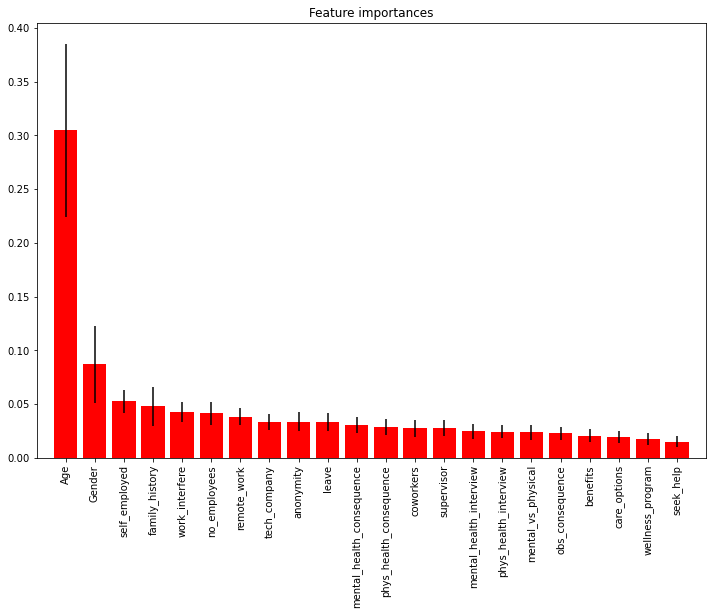

In [12]:
# Build a forest and compute the feature importances
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
feature_cols = ['Age','Gender', 'self_employed', 'family_history',  'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
X = train_df[feature_cols]
y = train_df.treatment
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
feature_cols = ['Age', 'Gender', 'self_employed','family_history','work_interfere', 'no_employees', 'remote_work', 'tech_company', 'leave'] 
X = train_df[feature_cols]
y = train_df.treatment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
d1={"Model Name":["Accuracy","Precission","Recall","F1-Score"]} # dictionary to store accuracy,fp,tp...




In [14]:
from sklearn import metrics
def calculate(model,y_test,y_pred):
    acc=metrics.accuracy_score(y_test, y_pred)*100
    print('Accuracy: for ',model, acc)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    precision=metrics.precision_score(y_test, y_pred)
    recall=TP/float(TP+FN)
    F1_score = 2 * (precision * recall) / (precision + recall)
    
    

    l1=[]
    l1.append(round(acc,4))
    l1.append(round(precision,4))
    l1.append(round(recall,4))
    l1.append(round(F1_score,4))
    if model not in d1:
        d1[model] = list()
        d1[model].extend(l1)



In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

Accuracy: for  DecisionTree 74.86772486772487


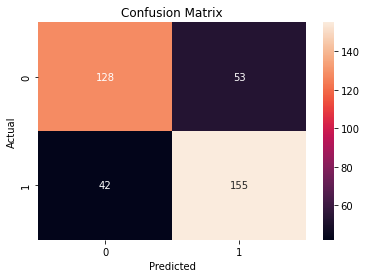

In [16]:
calculate("DecisionTree",y_test,y_pred)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Accuracy: for  RandomForest 79.8941798941799


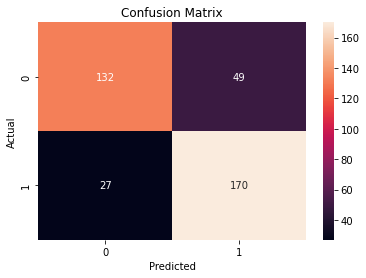

In [18]:
y_pred=rf.predict(X_test)
calculate("RandomForest",y_test,y_pred)

In [19]:
from sklearn.metrics import roc_curve,auc
fals_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: for  KNN 78.57142857142857


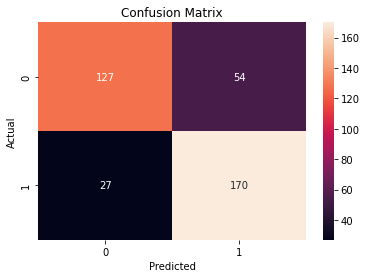

In [20]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
calculate("KNN",y_test,y_pred)

Accuracy: for  Logistics Regression 79.36507936507937


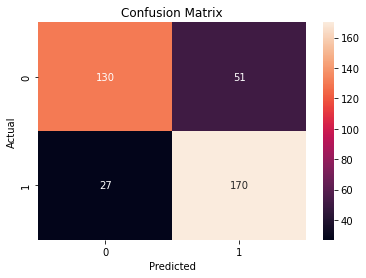

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make class predictions for the testing set
y_pred = logreg.predict(X_test)
calculate("Logistics Regression",y_test,y_pred)


Accuracy: for  Ada boost 82.27513227513228


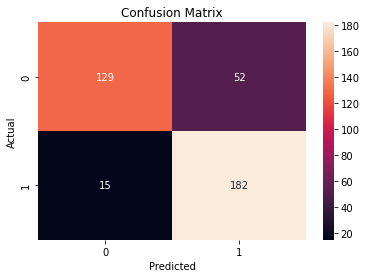

In [22]:
from sklearn.ensemble import AdaBoostClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)

# make class predictions for the testing set
y_pred = boost.predict(X_test)
calculate("Ada boost",y_test,y_pred)

Accuracy: for  SVM 80.42328042328042


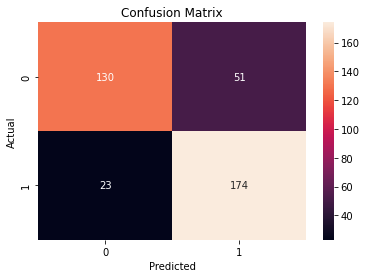

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
calculate("SVM",y_test,y_pred)

In [24]:
for key, value in d1.items():
    a,p,r,f  = value
    print("{:<25} {:<20} {:<25} {:<30} {:<30}".format(key,a, p, r,f))

Model Name                Accuracy             Precission                Recall                         F1-Score                      
DecisionTree              74.8677              0.7452                    0.7868                         0.7654                        
RandomForest              79.8942              0.7763                    0.8629                         0.8173                        
KNN                       78.5714              0.7589                    0.8629                         0.8076                        
Logistics Regression      79.3651              0.7692                    0.8629                         0.8134                        
Ada boost                 82.2751              0.7778                    0.9239                         0.8445                        
SVM                       80.4233              0.7733                    0.8832                         0.8246                        


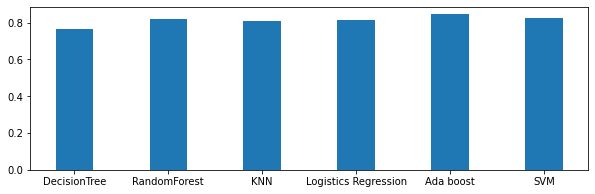

In [25]:
l1=list()
l2=list()
for key,values in d1.items():
    if key not in 'Model Name':
        a,p,r,f=values
        l1.append(f)
        l2.append(key)
plt.figure(figsize=(10,3))
plt.bar(l2,l1,width=0.4)
plt.show()


In [26]:
d1

{'Model Name': ['Accuracy', 'Precission', 'Recall', 'F1-Score'],
 'DecisionTree': [74.8677, 0.7452, 0.7868, 0.7654],
 'RandomForest': [79.8942, 0.7763, 0.8629, 0.8173],
 'KNN': [78.5714, 0.7589, 0.8629, 0.8076],
 'Logistics Regression': [79.3651, 0.7692, 0.8629, 0.8134],
 'Ada boost': [82.2751, 0.7778, 0.9239, 0.8445],
 'SVM': [80.4233, 0.7733, 0.8832, 0.8246]}

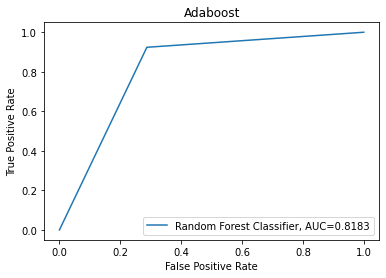

In [27]:
#printing details of bets algorithm
from sklearn import metrics
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#set up plotting area
plt.figure(0).clf()

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)

# make class predictions for the testing set
y_pred = boost.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Adaboost")
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

#add legend
plt.legend()


Accuracy: for  Ada boost 83.29355608591885


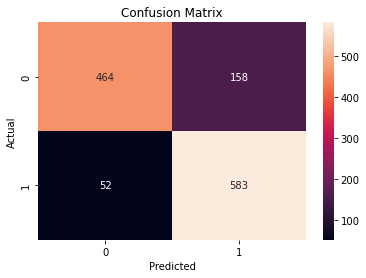

In [28]:
y_pred = boost.predict(X)
calculate("Ada boost",y,y_pred)

In [29]:
train_df.to_csv("final_df.csv",index=False)


In [30]:
y=y.values
print(type(y))

<class 'numpy.ndarray'>


In [31]:
acc = []
acc_sum = 0
for i in range(len(y)):
    if(y[i]==y_pred[i]):
        acc_sum=acc_sum+1
    accuracy = acc_sum/(i+1)
    acc.append(accuracy)

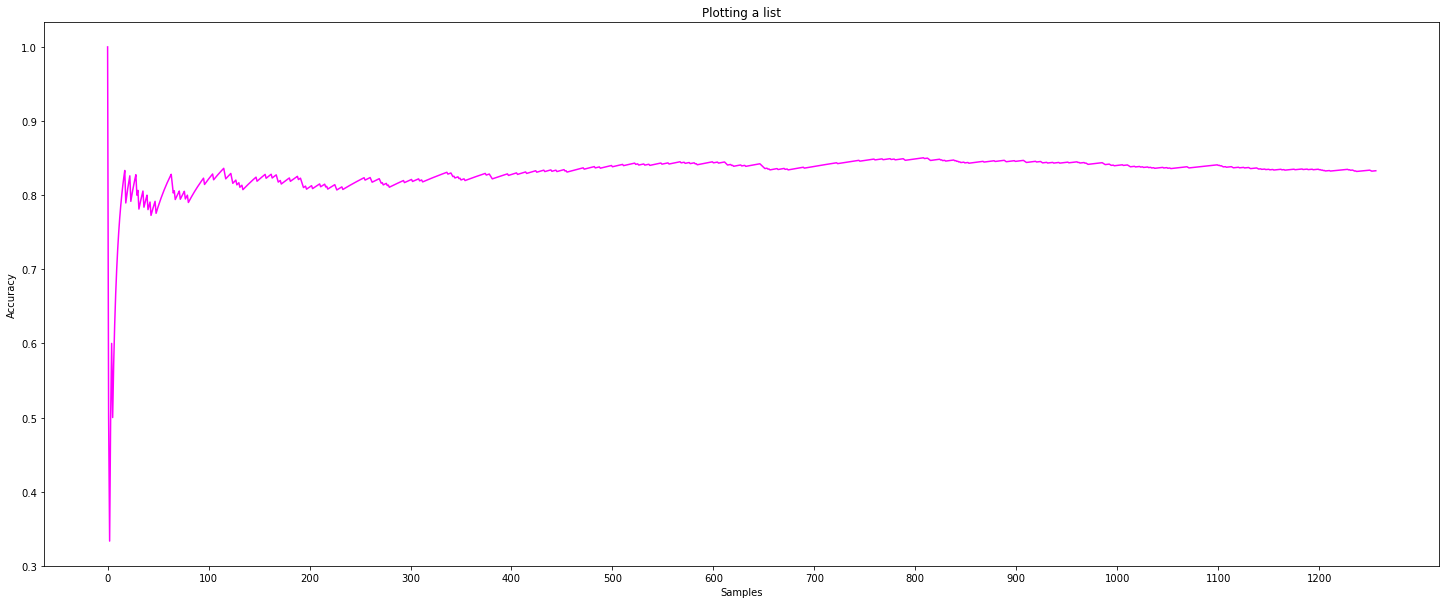

In [32]:
plt.figure(figsize=(25, 10))
plt.plot(acc, color='magenta',mfc='pink' ) #plot the data
plt.xticks(range(0,len(acc)+1, 100)) #set the tick frequency on x-axis
plt.ylabel('Accuracy') #set the label for y axis
plt.xlabel('Samples') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show()